# Define FPU System

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Define the FPU system
def fpu_system(t, y, alpha, beta=None):
    n = len(y) // 2
    displacements = y[:n]
    velocities = y[n:]

    accelerations = np.zeros_like(displacements)
    for i in range(1, n - 1):
        accelerations[i] = (displacements[i+1] - displacements[i]) + \
                          (displacements[i-1] - displacements[i])
        if beta is None:  # Quadratic case
            accelerations[i] += alpha * ((displacements[i+1] - displacements[i])**2 + \
                                        (displacements[i-1] - displacements[i])**2)
        else:  # Cubic case
            accelerations[i] += beta * ((displacements[i+1] - displacements[i])**3 + \
                                       (displacements[i-1] - displacements[i])**3)

    return np.concatenate([velocities, accelerations])

# System configuration

In [160]:
n = 32  # Number of points
alpha = 0.25
beta = 0.25  # Parameter for the cubic case
initial_displacements = np.sin(np.pi * np.arange(n) / (n - 1))
initial_velocity_cases = [
    np.zeros_like(initial_displacements),  # Initial velocity = 0
    -0.1 * np.sin(2 * np.pi * np.arange(n) / n)  # Non-zero initial velocity
]

# Cuadratic case, Initial Velocity = 0

C:\Users\Augusto\AppData\Local\Temp\ipykernel_23172\1976538281.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize='small', ncol=2)


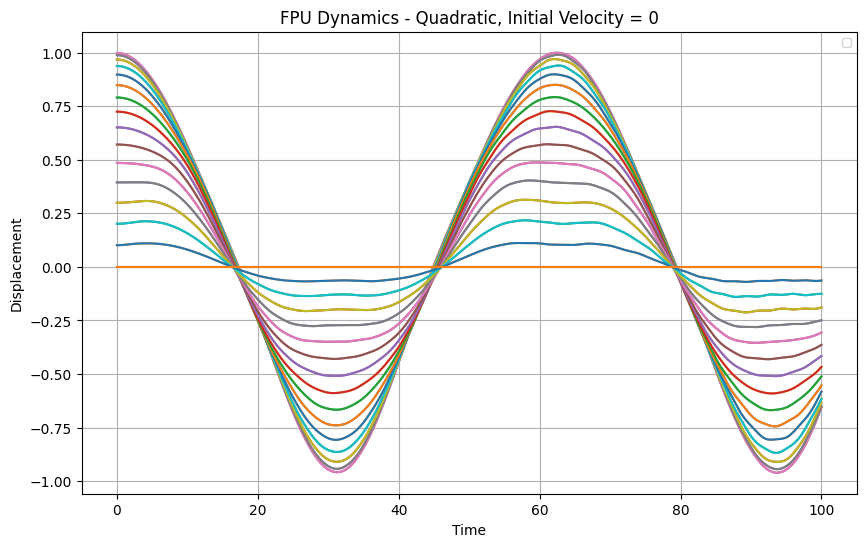

In [161]:
initial_conditions = np.concatenate([initial_displacements, initial_velocity_cases[0]])
t_span = [0, 9000]
t_eval = np.linspace(0, 100, 1000)
solution = solve_ivp(fpu_system, t_span, initial_conditions, args=(alpha, None), method='RK45', t_eval=t_eval)

# Plot results
plt.figure(figsize=(10, 6))
time = solution.t
positions = solution.y[:n, :]
for i in range(n):
    plt.plot(time, positions[i])

plt.title('FPU Dynamics - Quadratic, Initial Velocity = 0')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid()
plt.savefig('fpu_quadratic_velocity_0.png')
plt.show()

# Quadratic case, Initial Velocity ≠ 0

C:\Users\Augusto\AppData\Local\Temp\ipykernel_23172\874090025.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize='small', ncol=2)


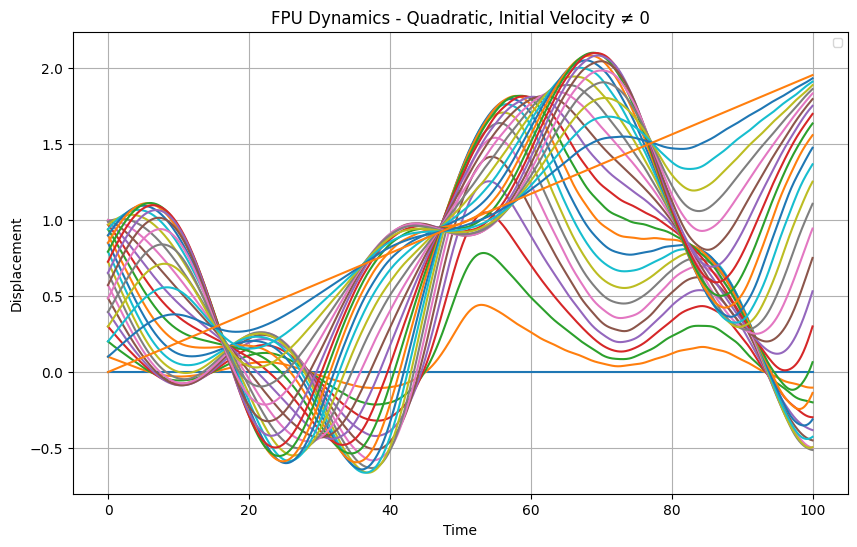

In [162]:
initial_conditions = np.concatenate([initial_displacements, initial_velocity_cases[1]])
solution = solve_ivp(fpu_system, t_span, initial_conditions, args=(alpha, None), method='RK45', t_eval=t_eval)

# Plot results
plt.figure(figsize=(10, 6))
time = solution.t
positions = solution.y[:n, :]
for i in range(n):
    plt.plot(time, positions[i])

plt.title('FPU Dynamics - Quadratic, Initial Velocity ≠ 0')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid()
plt.savefig('fpu_quadratic_velocity_non_zero.png')
plt.show()

# Cubic case, Initial Velocity = 0

C:\Users\Augusto\AppData\Local\Temp\ipykernel_23172\3810664764.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize='small', ncol=2)


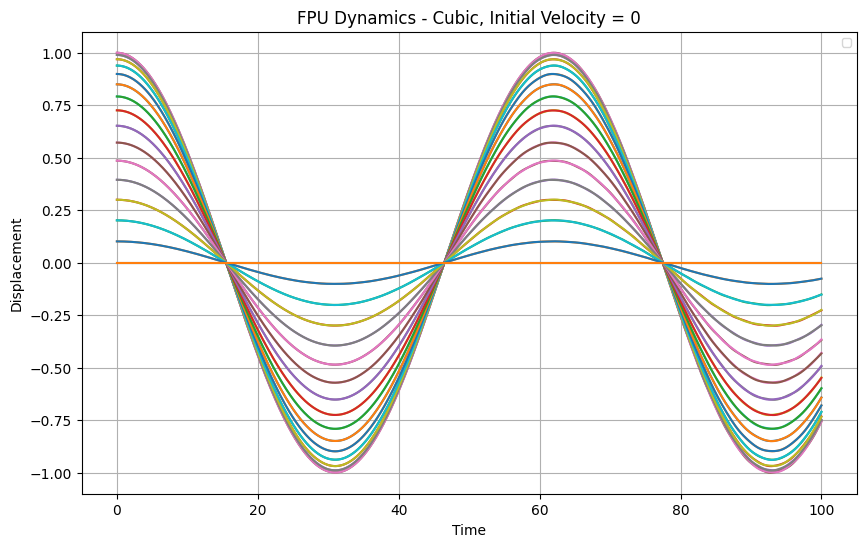

In [163]:
initial_conditions = np.concatenate([initial_displacements, initial_velocity_cases[0]])
solution = solve_ivp(fpu_system, t_span, initial_conditions, args=(alpha, beta), method='RK45', t_eval=t_eval)

# Plot results
plt.figure(figsize=(10, 6))
time = solution.t
positions = solution.y[:n, :]
for i in range(n):
    plt.plot(time, positions[i])

plt.title('FPU Dynamics - Cubic, Initial Velocity = 0')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid()
plt.savefig('fpu_cubic_velocity_0.png')
plt.show()

# Cubic case, Initial Velocity ≠ 0

C:\Users\Augusto\AppData\Local\Temp\ipykernel_23172\799942091.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize='small', ncol=2)


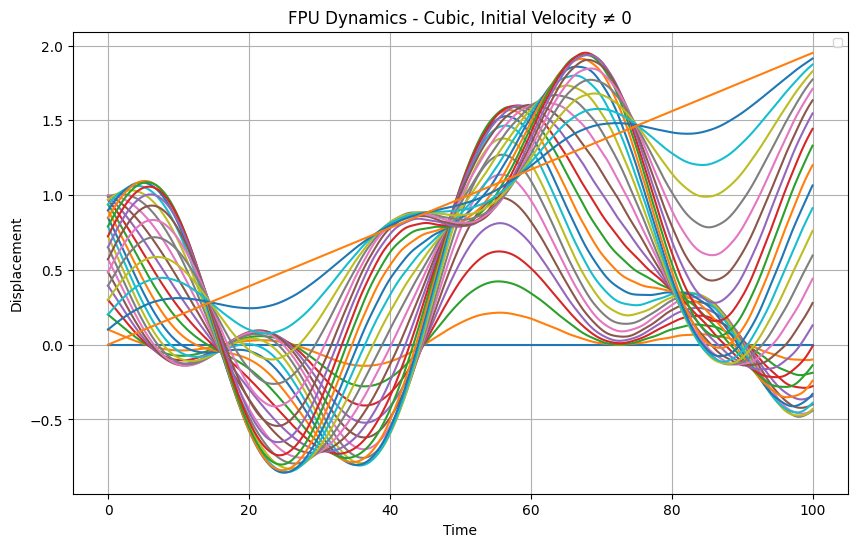

In [164]:
initial_conditions = np.concatenate([initial_displacements, initial_velocity_cases[1]])
solution = solve_ivp(fpu_system, t_span, initial_conditions, args=(alpha, beta), method='RK45', t_eval=t_eval)

# Plot results
plt.figure(figsize=(10, 6))
time = solution.t
positions = solution.y[:n, :]
for i in range(n):
    plt.plot(time, positions[i])

plt.title('FPU Dynamics - Cubic, Initial Velocity ≠ 0')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid()
plt.savefig('fpu_cubic_velocity_non_zero.png')
plt.show()